In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("flights19-23.csv")
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(3000000, 32)

In [6]:
df.dtypes

FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME           float64
ELAPSED_TIME               float64
AIR_TIME                   float64
DISTANCE                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER   

Unnecessary columns
* AIRLINE_DOT (redundant)
* AIRLINE_CODE (redundant)
* DOT_CODE (unique value)
* FL_NUMBER (unique value)
* CRS_DEP_TIME (redundant and in local time, using DEP_DELAY instead)
* DEP_TIME (redundant and in local time, using DEP_DELAY instead)
* WHEELS_OFF (redundant and in local time, using TAXI_OUT instead)
* WHEELS_ON (rendundant and in local time, using TAXI_IN instead)
* CRS_ARR_TIME (redundant and in local time, using ARR_DELAY instead)
* ARR_TIME (redundant and in local time, using ARR_DELAY instead)
* ORIGIN_CITY (redundant, ORIGIN gives airport code which you can use to find the city)
* DEST_CITY (redundant, DEST gives airport code which you can use to find the city)
* CRS_ELAPSED_TIME (while prolonged air time may relate to delay future flights, I think we can use ARR_DELAY and DISTANCE to capture the same data)
* ELAPSED_TIME (same reason as CRS_ELAPSED_TIME)
* AIR_TIME (same as CRS_ELAPSED_TIME)

In [7]:
cleaned_df = pd.DataFrame(df[["FL_DATE", "AIRLINE", "ORIGIN", "DEST", "DEP_DELAY", "TAXI_OUT", "TAXI_IN",
                               "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED", "DISTANCE", "DELAY_DUE_CARRIER", 
                               "DELAY_DUE_WEATHER", "DELAY_DUE_NAS", "DELAY_DUE_SECURITY", "DELAY_DUE_LATE_AIRCRAFT"]])
cleaned_df

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,FLL,EWR,-4.0,19.0,4.0,-14.0,0.0,NaN,0.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,-6.0,9.0,38.0,-5.0,0.0,NaN,0.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,DEN,MSP,6.0,20.0,5.0,0.0,0.0,NaN,0.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,-1.0,27.0,9.0,24.0,0.0,NaN,0.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,MCO,DFW,-2.0,15.0,14.0,-1.0,0.0,NaN,0.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,JAX,CLT,-2.0,10.0,6.0,-16.0,0.0,NaN,0.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,ORD,AUS,-6.0,10.0,5.0,-37.0,0.0,NaN,0.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,HSV,ATL,41.0,16.0,6.0,36.0,0.0,NaN,0.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,BOS,LGA,-5.0,19.0,8.0,-16.0,0.0,NaN,0.0,184.0,NaN,NaN,NaN,NaN,NaN


In [8]:
cleaned_df.shape

(3000000, 17)

In [9]:
print(cleaned_df.isnull().sum())

FL_DATE                          0
AIRLINE                          0
ORIGIN                           0
DEST                             0
DEP_DELAY                    77644
TAXI_OUT                     78806
TAXI_IN                      79944
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_LATE_AIRCRAFT    2466137
dtype: int64


<Axes: >

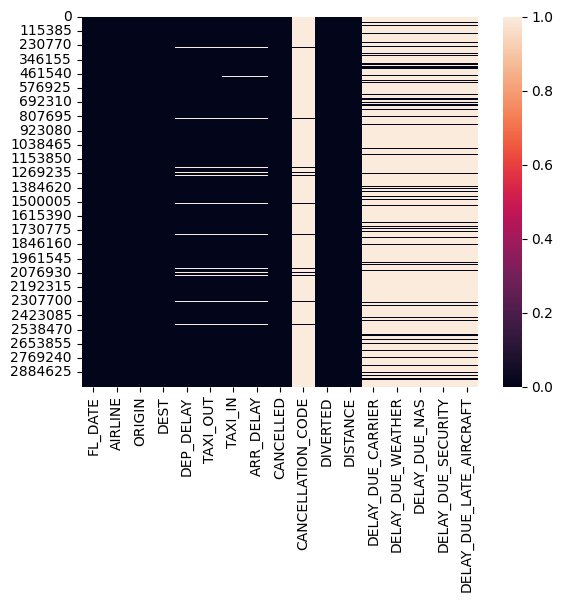

In [10]:
sns.heatmap(data=cleaned_df.isnull())

Missing values in cancelation code and delay causes are probably because there was no delays so we can replace them with zeros. Other missing values seem to be from the flight being cancelled. If we replace those values like for 

In [11]:
# cleaned_df.dropna(subset=["DEP_DELAY", "CRS_ELAPSED_TIME", "TAXI_OUT", "TAXI_IN", "ARR_DELAY", "ELAPSED_TIME", "AIR_TIME"], axis=0)

In [12]:
cleaned_df["CANCELLATION_CODE"] = cleaned_df["CANCELLATION_CODE"].fillna("N")
cleaned_df["DELAY_DUE_CARRIER"] = cleaned_df["DELAY_DUE_CARRIER"].fillna(0)
cleaned_df["DELAY_DUE_WEATHER"] = cleaned_df["DELAY_DUE_WEATHER"].fillna(0)
cleaned_df["DELAY_DUE_NAS"] = cleaned_df["DELAY_DUE_NAS"].fillna(0)
cleaned_df["DELAY_DUE_SECURITY"] = cleaned_df["DELAY_DUE_SECURITY"].fillna(0)
cleaned_df["DELAY_DUE_LATE_AIRCRAFT"] = cleaned_df["DELAY_DUE_LATE_AIRCRAFT"].fillna(0)

<Axes: xlabel='count', ylabel='AIRLINE'>

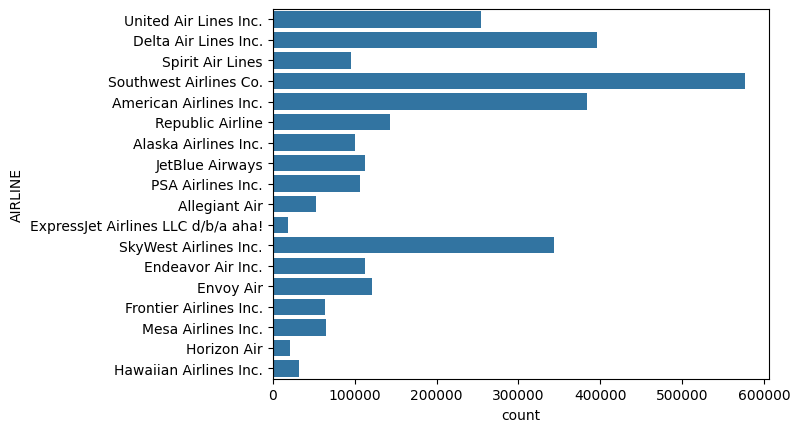

In [13]:
sns.countplot(data=cleaned_df["AIRLINE"])

In [14]:
cleaned_df["ORIGIN"].value_counts()

ORIGIN
ATL    153556
DFW    130334
ORD    122296
DEN    119919
CLT     94304
        ...  
ART        21
OGD        18
ILG        17
FLO         8
IPT         6
Name: count, Length: 380, dtype: int64

In [15]:
cleaned_df["DEST"].value_counts()

DEST
ATL    153569
DFW    129770
ORD    123334
DEN    119592
CLT     95413
        ...  
BFM        24
FLO        17
CDB        17
ILG        13
IPT        11
Name: count, Length: 380, dtype: int64

In [16]:
print(cleaned_df["CANCELLED"].value_counts())
print("\n")
print(cleaned_df["DIVERTED"].value_counts())

CANCELLED
0.0    2920860
1.0      79140
Name: count, dtype: int64


DIVERTED
0.0    2992944
1.0       7056
Name: count, dtype: int64


In [17]:
# making CANCELLED and DIVERTED ints because there's only two values and no reason for it to be a float
cleaned_df["CANCELLED"]= cleaned_df["CANCELLED"].astype(int)
print(cleaned_df["CANCELLED"].value_counts())
cleaned_df["DIVERTED"] = cleaned_df["DIVERTED"].astype(int)
print("\n")
print(cleaned_df["DIVERTED"].value_counts())


CANCELLED
0    2920860
1      79140
Name: count, dtype: int64


DIVERTED
0    2992944
1       7056
Name: count, dtype: int64


Making FL_DATE into columns for YEAR, MONTH, and DAY

In [18]:
def split_date(val):
    temp = val.split("-")
    temp[0] = int(temp[0])
    temp[1] = int(temp[1])
    temp[2] = int(temp[2])
    return temp

In [19]:
cleaned_df["YEAR"] = 0
cleaned_df["MONTH"] = 0
cleaned_df["DAY"] = 0

In [20]:
for index, row in cleaned_df.iterrows():
    data = split_date(row["FL_DATE"])
    cleaned_df.at[index, "YEAR"] = data[0]
    cleaned_df.at[index, "MONTH"] = data[1]
    cleaned_df.at[index, "DAY"] = data[2]

In [21]:
cleaned_df.head()

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,YEAR,MONTH,DAY
0,2019-01-09,United Air Lines Inc.,FLL,EWR,-4.0,19.0,4.0,-14.0,0,not cancelled,0,1065.0,0.0,0.0,0.0,0.0,0.0,2019,1,9
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,-6.0,9.0,38.0,-5.0,0,not cancelled,0,1399.0,0.0,0.0,0.0,0.0,0.0,2022,11,19
2,2022-07-22,United Air Lines Inc.,DEN,MSP,6.0,20.0,5.0,0.0,0,not cancelled,0,680.0,0.0,0.0,0.0,0.0,0.0,2022,7,22
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,-1.0,27.0,9.0,24.0,0,not cancelled,0,1589.0,0.0,0.0,24.0,0.0,0.0,2023,3,6
4,2020-02-23,Spirit Air Lines,MCO,DFW,-2.0,15.0,14.0,-1.0,0,not cancelled,0,985.0,0.0,0.0,0.0,0.0,0.0,2020,2,23


### Creating boxplots to check for outliers

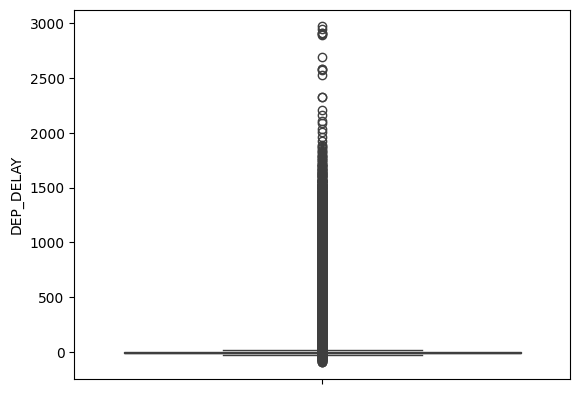

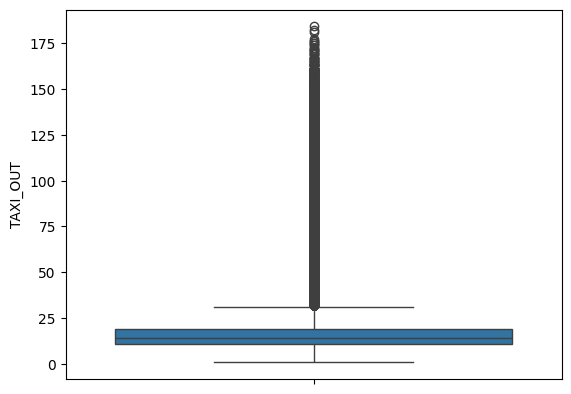

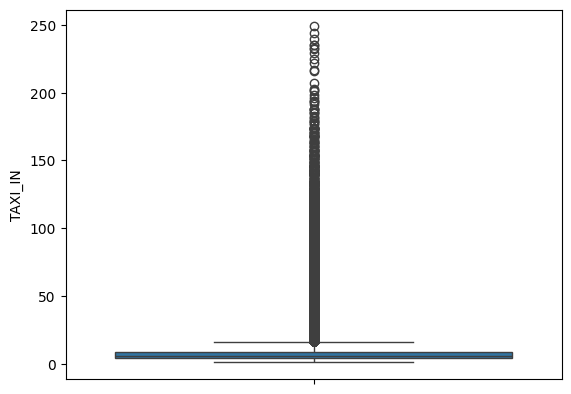

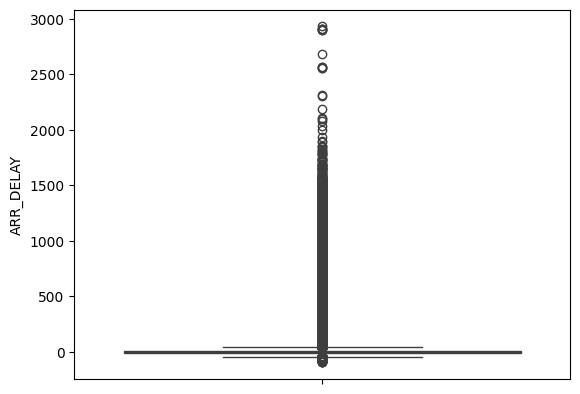

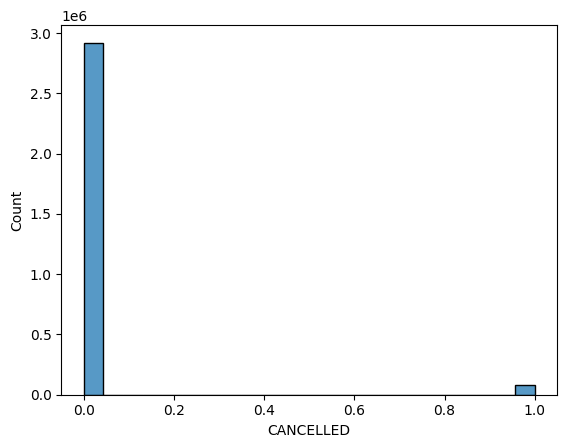

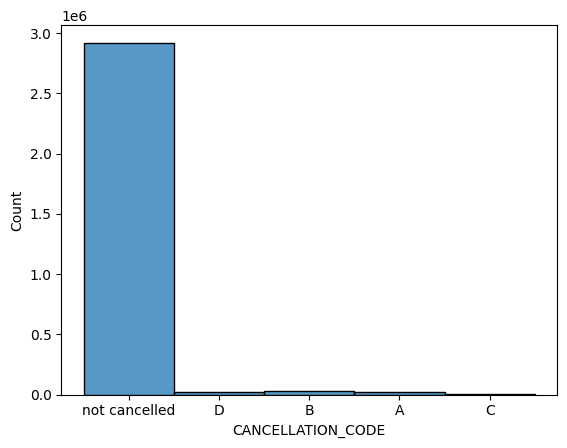

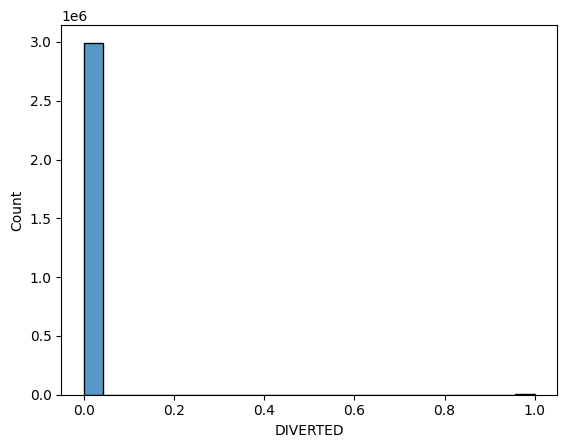

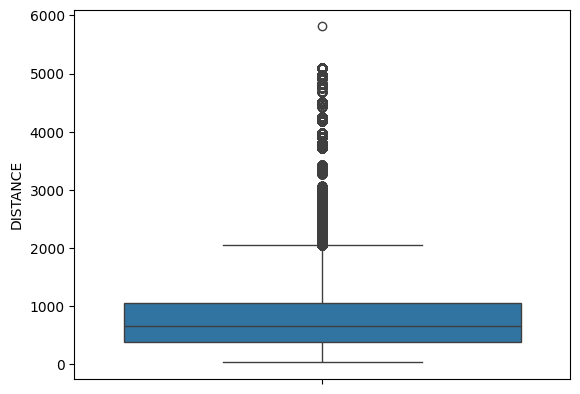

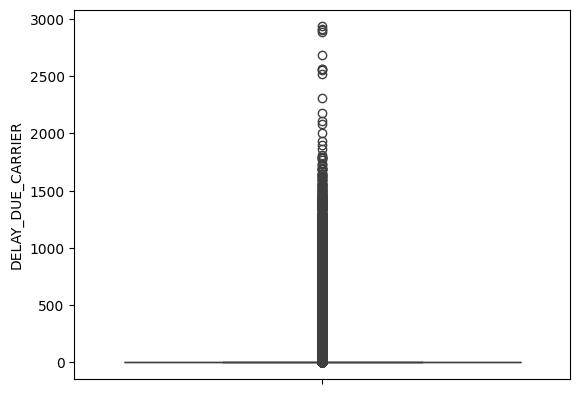

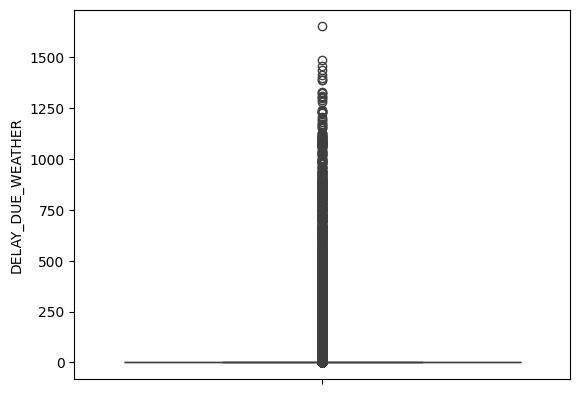

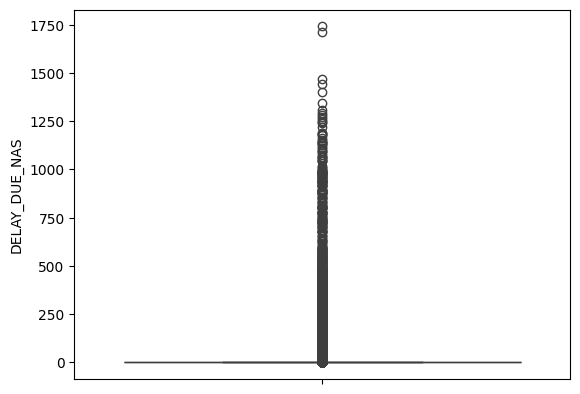

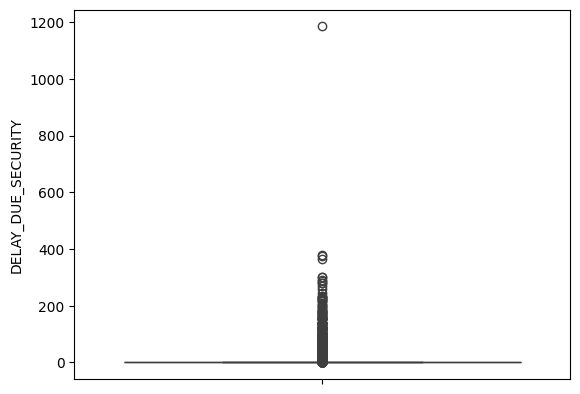

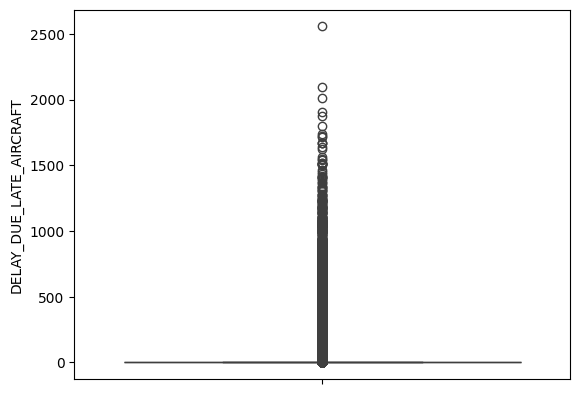

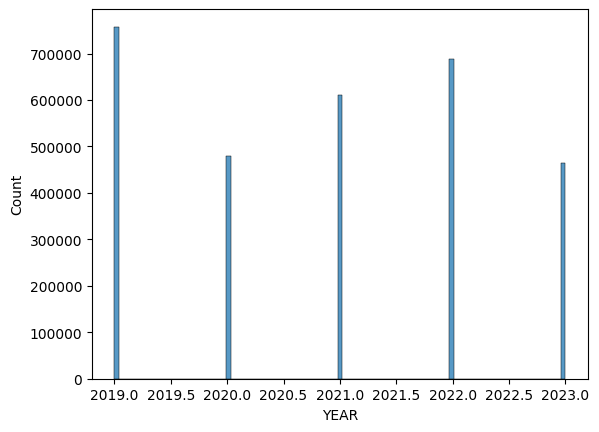

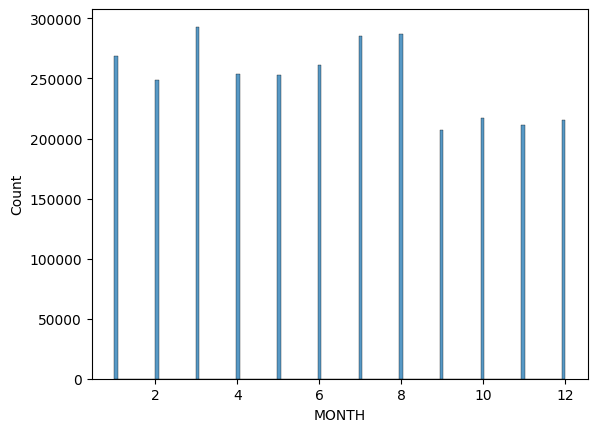

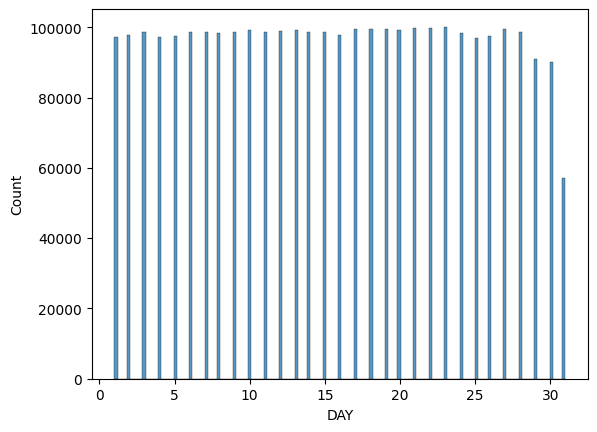

In [23]:
for col in cleaned_df.columns[4:]:
    if(col == "CANCELLED" or col == "DIVERTED" or col == "CANCELLATION_CODE" or col == "YEAR" or col == "MONTH" or col == "DAY"):
        sns.histplot(data=cleaned_df[col])
        plt.show()
    else:
        sns.boxplot(data=cleaned_df[col])
        plt.show()

Although there are some outliers, I think all of these outliers are significant and not a result of error. The outliers in this case are the delays so they are very important for our model.

#### Cancellation Codes
* A: Due to Carrier
* B: Due to Weather
* C: Due to the National Aviaiton System
* D: Due to Security



In [98]:
df["CANCELLATION_CODE"].value_counts()

CANCELLATION_CODE
B    28772
D    24417
A    19476
C     6475
Name: count, dtype: int64